### Load Data

In [1]:
from src import vectorization
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
import datetime

In [2]:
vectorizer = vectorization.Vectorizer('messages_info.db')

X_train, X_test, y_train, y_test = vectorizer.fit(workers=10)

100%|██████████| 31/31 [00:23<00:00,  1.30it/s]


### Visualization

In [3]:
X = np.vstack([X_train, X_test])
X.shape

(26216, 300)

[t-SNE] Computing 2248 nearest neighbors...
[t-SNE] Indexed 26216 samples in 0.038s...
[t-SNE] Computed neighbors for 26216 samples in 84.870s...
[t-SNE] Computed conditional probabilities for sample 1000 / 26216
[t-SNE] Computed conditional probabilities for sample 2000 / 26216
[t-SNE] Computed conditional probabilities for sample 3000 / 26216
[t-SNE] Computed conditional probabilities for sample 4000 / 26216
[t-SNE] Computed conditional probabilities for sample 5000 / 26216
[t-SNE] Computed conditional probabilities for sample 6000 / 26216
[t-SNE] Computed conditional probabilities for sample 7000 / 26216
[t-SNE] Computed conditional probabilities for sample 8000 / 26216
[t-SNE] Computed conditional probabilities for sample 9000 / 26216
[t-SNE] Computed conditional probabilities for sample 10000 / 26216
[t-SNE] Computed conditional probabilities for sample 11000 / 26216
[t-SNE] Computed conditional probabilities for sample 12000 / 26216
[t-SNE] Computed conditional probabilities for 

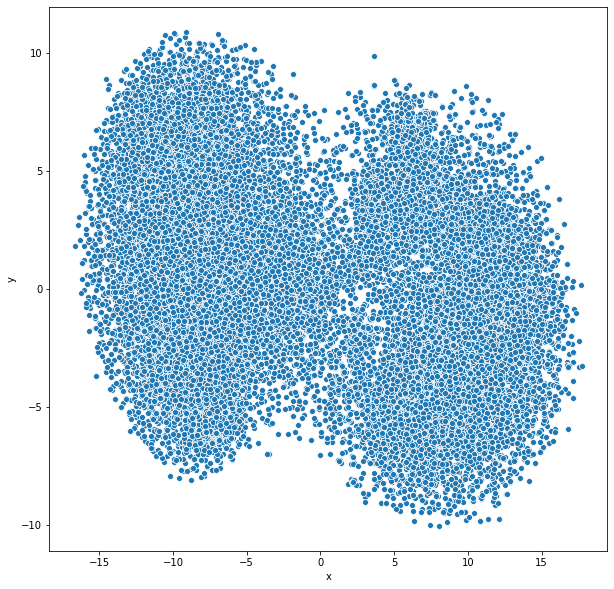

In [4]:
X_reduced = PCA(n_components=50).fit_transform(X)
visual = TSNE(n_components=2,
              perplexity=X_reduced.shape[0]/y_train.shape[1],
              learning_rate=1000,
              early_exaggeration=100,
              n_iter=1000,
              verbose=2).fit_transform(X_reduced)

visual = pd.DataFrame(visual, columns=['x', 'y'])

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='x', y='y', data=visual, ax=ax)

### Model Testing (Supervised)

In [5]:
labels = ['Logistic Regression', 'SVC', 'AdaBoost', 'GradientBoosting']

In [6]:
logreg = MultiOutputClassifier(LogisticRegression(solver='lbfgs', n_jobs=12))
logreg_start = datetime.datetime.now()
logreg.fit(X_train, y_train)
logreg_end = datetime.datetime.now()
y_hat_logreg = logreg.predict(X_test)

logreg_results = {
    'Training Time': str(logreg_end-logreg_start),
    'Average F1-Score': np.mean([f1_score(y_test.values[:, category], y_hat_logreg[:, category], average='weighted') for category in range(y_test.shape[1])])
}

/home/marco/anaconda3/envs/disaster_pipeline/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
svc = MultiOutputClassifier(SVC(gamma='scale'))
svc_start = datetime.datetime.now()
svc.fit(X_train, y_train)
svc_end = datetime.datetime.now()
y_hat_svc = svc.predict(X_test)

svc_results = {
    'Training Time': str(svc_end-svc_start),
    'Average F1-Score': np.mean([f1_score(y_test.values[:, category], y_hat_svc[:, category], average='weighted') for category in range(y_test.shape[1])])
}

/home/marco/anaconda3/envs/disaster_pipeline/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
adaboost = MultiOutputClassifier(AdaBoostClassifer())
adaboost_start = datetime.datetime.now()
adaboost.fit(X_train, y_train)
adaboost_end = datetime.datetime.now()
y_hat_adaboost = adaboost.predict(X_test)

adaboost_results = {
    'Training Time': str(adaboost_end-adaboost_start),
    'Average F1-score': np.mean([f1_score(y_test.values[:, category], y_hat_adaboost[:, category], average='weighted') for category in range(y_test.shape[1])])
}

SyntaxError: invalid syntax (<ipython-input-8-408be00f794d>, line 9)

In [ ]:
gradboost = MultiOutputClassifier(GradientBoostingClassifier())
gradboost_start = datetime.datetime.now()
gradboost.fit(X_train, y_train)
gradboost_end = datetime.datetime.now()
y_hat_gradboost = gradboost.predict(X_train, y_train)

gradboost_results = {
    'Training Time': str(gradboost_end-gradboost_start),
    'Average F1-Score': np.mean([f1_score(y_test.values[:, category], y_hat_gradboost[:, category], average='weighted') for category in range(y_test.shape[1])])
}

### Model Testing (Unsupervised)

Test here:
- KMeans
- GMM 

With one cluster for each category in y_train

Also test OPTICS